# Geometric Figures

### Projection Volume

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Arc

In [2]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

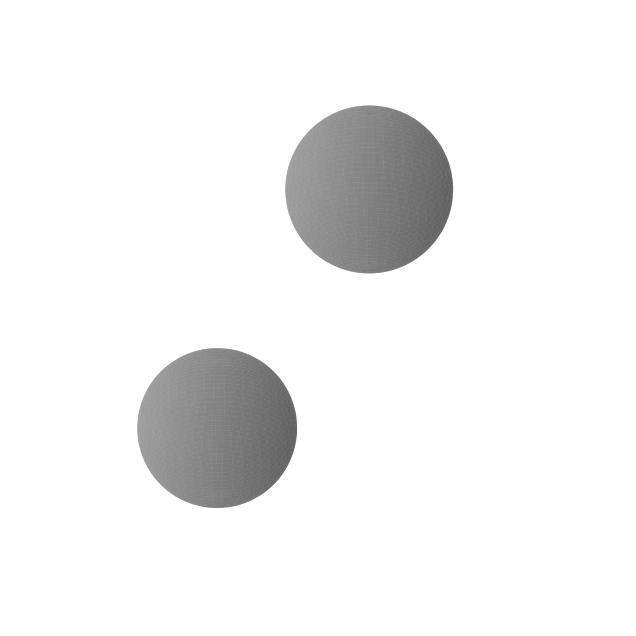

In [3]:
# Define v_rel
vrel = np.array([0.5, 0.2, 1.])
d = 4
vrel /= np.linalg.norm(vrel)

# Create a sphere
radius = 1
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)

# Create a second sphere
x_shifted = x + d * vrel[0]
y_shifted = y + d * vrel[1]
z_shifted = z + d * vrel[2]


# Plot
fig = plt.figure(figsize=(8, 8))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')

# Plot spheres
ax.plot_surface(x, y, z, color='gray', alpha=0.5)
ax.plot_surface(x_shifted, y_shifted, z_shifted, color='gray', alpha=0.5)

# Set intervals for each axis
ax.set_xlim(-1, 3)  # Set interval for the x-axis
ax.set_ylim(-1, 3)  # Set interval for the y-axis
ax.set_zlim(-1, 4)  # Set interval for the z-axis

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 5./4.])  

# Hide the axes
ax.axis('off')

#  Save the figure to a file
plt.savefig('../Graphs/ProjVol1.png', dpi=300, bbox_inches='tight')


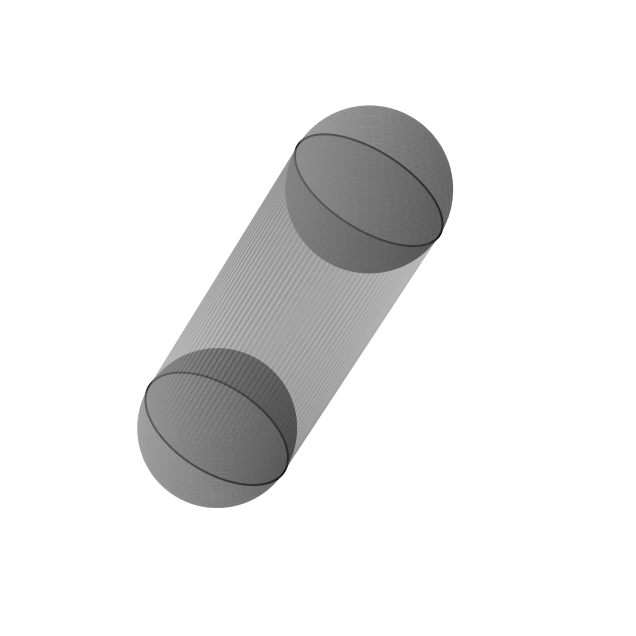

In [4]:
# Create a circle in the XY plane
theta = np.linspace(0, 2*np.pi, 100)
circ1_x = np.cos(theta)
circ1_y = np.sin(theta)
circ1_z = np.zeros_like(theta)

# Calculate the rotation axis and angle
rotation_axis = np.cross([0, 0, 1], vrel)
rotation_angle = np.arccos(np.dot([0, 0, 1], vrel))

# Rotate the circle to align with vrel
R = rotation_matrix(rotation_axis, rotation_angle)
circ1_x, circ1_y, circ1_z = np.dot(R, np.array([circ1_x, circ1_y, circ1_z]))

# Calculate the coordinates of the second circumference
circ2_x = circ1_x + d * vrel[0]
circ2_y = circ1_y + d * vrel[1]
circ2_z = circ1_z + d * vrel[2]

# Combine the vertices of the cylinder
vertices = np.concatenate((np.array([circ1_x, circ1_y, circ1_z]).T, np.array([circ2_x, circ2_y, circ2_z]).T))

# Define the faces of the cylinder
faces = []
for i in range(100):
    if i != 99:
        faces.append([i, i+1, i+100])
        faces.append([i+1, i+100, i+101])
    else:
        faces.append([i, 0, i+100])
        faces.append([0, i+100, 1])


# Plot
fig = plt.figure(figsize=(8, 8))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')

# Plot spheres
ax.plot_surface(x, y, z, color='gray', alpha=0.5)
ax.plot_surface(x_shifted, y_shifted, z_shifted, color='gray', alpha=0.5)

# Plot circumferences
ax.plot(circ1_x, circ1_y, circ1_z, color='black')
ax.plot(circ2_x, circ2_y, circ2_z, color='black')

# Plot the cylinder
ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles=faces, color='gray', alpha=0.3)

# Set intervals for each axis
ax.set_xlim(-1, 3)  # Set interval for the x-axis
ax.set_ylim(-1, 3)  # Set interval for the y-axis
ax.set_zlim(-1, 4)  # Set interval for the z-axis

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 5./4.])  

# Hide the axes
ax.axis('off')

#  Save the figure to a file
plt.savefig('../Graphs/ProjVol2.png', dpi=300, bbox_inches='tight')

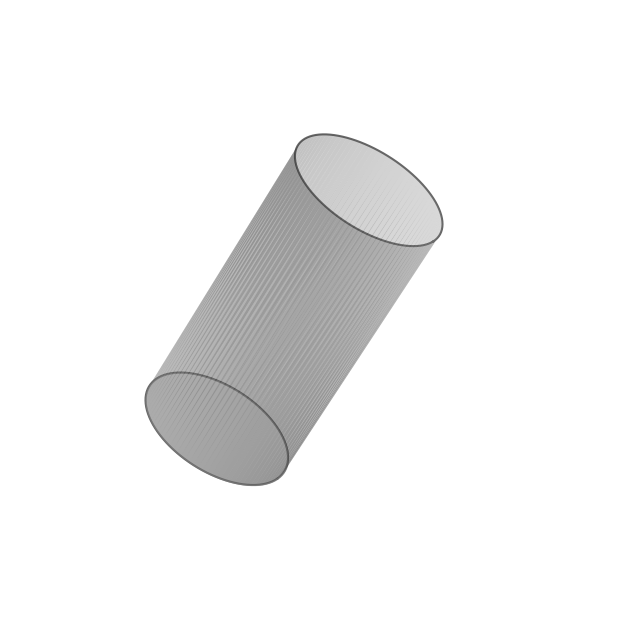

In [5]:
# Plot
fig = plt.figure(figsize=(8, 8))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')


# Plot circumferences
ax.plot(circ1_x, circ1_y, circ1_z, color='black', alpha=0.6)
ax.plot(circ2_x, circ2_y, circ2_z, color='black', alpha=0.6)

# Calculate the vertices for filling the first circumference
vertices_fill = np.column_stack([circ1_x, circ1_y, circ1_z])

# Create a Poly3DCollection
poly = Poly3DCollection([vertices_fill], alpha=0.5, color='gray')

# Add the polygon to the plot
ax.add_collection3d(poly)

# Plot the cylinder
ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles=faces, color='gray', alpha=0.3)

# Set intervals for each axis
ax.set_xlim(-1, 3)  # Set interval for the x-axis
ax.set_ylim(-1, 3)  # Set interval for the y-axis
ax.set_zlim(-1, 4)  # Set interval for the z-axis

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 5./4.])  

# Hide the axes
ax.axis('off')

#  Save the figure to a file
plt.savefig('../Graphs/ProjVol3.png', dpi=300, bbox_inches='tight')

### Stadium

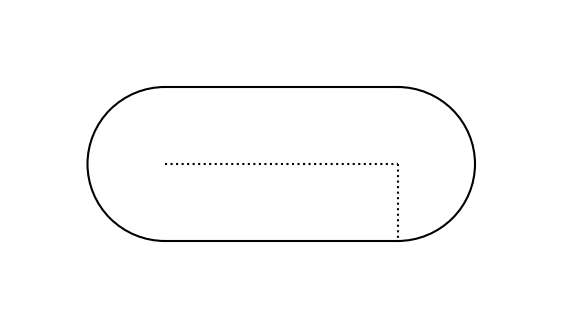

In [6]:
# Create a new plot for the 2D rectangle
fig = plt.figure(figsize=(7, 4))  # Adjust the size as needed
ax = fig.add_subplot(111)


# Plot the rectangle
ax.plot([2,5], [1,1], color='black')
ax.plot([2,5], [3,3], color='black')

# Add semicircles on the right and left sides of the rectangle
arc1 = Arc(xy=(2, 2), width=2, height=2, angle=0, theta1=90, theta2=270, color='black', linewidth=1.5)
arc2 = Arc(xy=(5, 2), width=2, height=2, angle=180, theta1=90, theta2=270, color='black', linewidth=1.5)
ax.add_patch(arc1)
ax.add_patch(arc2)

# Plot L and r
ax.plot([2,5], [2,2], color='black', linestyle=':')
ax.plot([5,5], [2,1], color='black', linestyle=':')


# Set intervals for each axis
ax.set_xlim(0, 7)  # Set interval for the x-axis
ax.set_ylim(0, 4)  # Set interval for the y-axis


# Set equal aspect ratio
# ax.set_box_aspect([4, 3, 1])  

# Hide the axes
ax.axis('off')

#  Save the figure to a file
plt.savefig('../Graphs/Stadium.png', dpi=300, bbox_inches='tight')

### Capsule

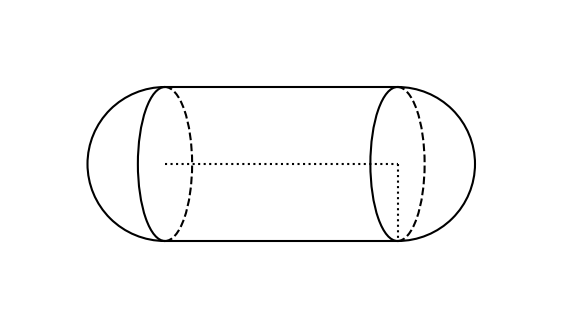

In [11]:
# Create a new plot for the 2D rectangle
fig = plt.figure(figsize=(7, 4))  # Adjust the size as needed
ax = fig.add_subplot(111)


# Plot the rectangle
ax.plot([2,5], [1,1], color='black')
ax.plot([2,5], [3,3], color='black')

# Add semicircles on the right and left sides of the rectangle
arc1 = Arc(xy=(2, 2), width=2, height=2, angle=0, theta1=90, theta2=270, color='black', linewidth=1.5)
arc2 = Arc(xy=(5, 2), width=2, height=2, angle=180, theta1=90, theta2=270, color='black', linewidth=1.5)
ax.add_patch(arc1)
ax.add_patch(arc2)

# Add 3D
arc1 = Arc(xy=(2, 2), width=0.7, height=2, angle=0, theta1=90, theta2=270, color='black', linewidth=1.5)
arc2 = Arc(xy=(2, 2), width=0.7, height=2, angle=180, theta1=90, theta2=270, color='black', linewidth=1.5, linestyle='--')
arc3 = Arc(xy=(5, 2), width=0.7, height=2, angle=0, theta1=90, theta2=270, color='black', linewidth=1.5)
arc4 = Arc(xy=(5, 2), width=0.7, height=2, angle=180, theta1=90, theta2=270, color='black', linewidth=1.5, linestyle='--')
ax.add_patch(arc1)
ax.add_patch(arc2)
ax.add_patch(arc3)
ax.add_patch(arc4)

# Plot L and r
ax.plot([2,5], [2,2], color='black', linestyle=':')
ax.plot([5,5], [2,1], color='black', linestyle=':')


# Set intervals for each axis
ax.set_xlim(0, 7)  # Set interval for the x-axis
ax.set_ylim(0, 4)  # Set interval for the y-axis


# Set equal aspect ratio
# ax.set_box_aspect([4, 3, 1])  

# Hide the axes
ax.axis('off')

#  Save the figure to a file
plt.savefig('../Graphs/Capsule.png', dpi=300, bbox_inches='tight')